In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [100]:
hdata1=pd.read_excel('health.xlsx', sheet_name='2016-17')

In [101]:
hdata1.head()

,P.No.,Name,Test Date,Year,Cycle,Gender,Age,Height,Weight,Division,...,ECG,ECG Remarks,TMT Status,TMT Date,TMT Remarks,Systematic Examination Remarks,Grade,Area,Phone,Email
0,306708,Shyamjee Prasad,21-Jan-2017,2016,1,Male,44,180.0,83,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,NaN,E-4,CX - Chasis Assy,7970480859,NaN
1,306833,Sanjay Kumar,30-Sep-2016,2016,1,Male,43,169.0,72,Vehicle Factory (excluding vehicle dispatch),...,WNL,NaN,Negative,NaN,NaN,NaN,E-6,Chassis Assembly,8092730508,NaN
2,302238,S D Singh,12-Jul-2016,2016,2,Male,63,175.0,85,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,NaN,TM-A,Vehicle Factory Maint.,NaN,NaN
3,302474,Shatrughna Singh,14-May-2016,2016,1,Male,64,166.0,64,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,302486,Sheo Kumar Singh,21-Jan-2017,2016,1,Male,64,164.0,84,Vehicle Factory (excluding vehicle dispatch),...,NaN,NaN,Negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
hdata1.drop(['P.No.','Cycle','Name','Test Date','Year','Systematic Examination Remarks','Grade','Area','Phone','Email','Division','BP Reading-2','BP Reading-3','FBS','PPBS','Hb1Ac','Chronic Disease Name','Distance Vision','LDL','ECG Remarks','TMT Date','TMT Remarks'], axis=1, inplace=True)

In [103]:
print(hdata1.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'BP Reading-1', 'RBS',
       'Addiction', 'Sick Leave', 'Chronic Disease',
       'Assesment from HealthIndex',
       'Assesment from HealthIndex (Improvement/Deterioration)',
       'HealthIndex Score', 'Addiction Score', 'BMI Score', 'HT Score',
       'DBT Score', 'Leave Score', 'Chronic Score', 'Urea', 'Creatinine',
       'Cholestrarol', 'Triglyceride', 'HDL', 'SGOT', 'SGPT', 'ECG',
       'TMT Status'],
      dtype='object')


In [104]:
hdata1.drop_duplicates(inplace=True) 

In [105]:
dups = hdata1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print(hdata1.shape)

Number of duplicate rows = 0
(698, 28)


In [106]:
hdata1.Gender=pd.Categorical(hdata1.Gender,{'Male','Female'},ordered=True)

In [107]:
hdata1.Gender

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
693    Male
694    Male
695    Male
696    Male
697    Male
Name: Gender, Length: 698, dtype: category
Categories (2, object): ['Female' < 'Male']

In [108]:
hdata1.Gender=hdata1.Gender.cat.codes

In [109]:
hdata1.Gender #MALE=0,FEMALE=1

0      1
1      1
2      1
3      1
4      1
      ..
693    1
694    1
695    1
696    1
697    1
Name: Gender, Length: 698, dtype: int8

In [110]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,BP Reading-1,RBS,Addiction,Sick Leave,Chronic Disease,...,Chronic Score,Urea,Creatinine,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,ECG,TMT Status
0,1,44,180.0,83,25.06,130/80,84.0,Y,0,N,...,3,16,1,NaN,NaN,NaN,NaN,NaN,NaN,Negative
1,1,43,169.0,72,25.21,170/110,116.0,N,4,N,...,3,NaN,1,218,153,41,NaN,NaN,WNL,Negative
2,1,63,175.0,85,27.76,130/80,181.0,Y,9,N,...,3,NaN,nil,nil,nil,NaN,NaN,NaN,NaN,Negative
3,1,64,166.0,64,23.23,120/80,94.0,Y,4,Y,...,3 | Detoriated | 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
4,1,64,164.0,84,31.23,150/90,102.0,Y,1,N,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative


In [111]:
hdata1.Addiction=pd.Categorical(hdata1.Addiction,{'Y','N'},ordered=True)
hdata1.Addiction=hdata1.Addiction.cat.codes
hdata1.Addiction  #Y=1,N=0

0      1
1      0
2      1
3      1
4      1
      ..
693    0
694    0
695    0
696    1
697    0
Name: Addiction, Length: 698, dtype: int8

In [112]:
hdata1.rename(columns={'Chronic Disease':'Chronic_Disease'},inplace=True)

In [113]:
hdata1.Chronic_Disease=pd.Categorical(hdata1.Chronic_Disease,{'Y','N'},ordered=True)
hdata1.Chronic_Disease=hdata1.Chronic_Disease.cat.codes
hdata1.Chronic_Disease #Y=1,N=0

0      0
1      0
2      0
3      1
4      0
      ..
693    1
694    0
695    0
696    0
697    1
Name: Chronic_Disease, Length: 698, dtype: int8

In [114]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,BP Reading-1,RBS,Addiction,Sick Leave,Chronic_Disease,...,Chronic Score,Urea,Creatinine,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,ECG,TMT Status
0,1,44,180.0,83,25.06,130/80,84.0,1,0,0,...,3,16,1,NaN,NaN,NaN,NaN,NaN,NaN,Negative
1,1,43,169.0,72,25.21,170/110,116.0,0,4,0,...,3,NaN,1,218,153,41,NaN,NaN,WNL,Negative
2,1,63,175.0,85,27.76,130/80,181.0,1,9,0,...,3,NaN,nil,nil,nil,NaN,NaN,NaN,NaN,Negative
3,1,64,166.0,64,23.23,120/80,94.0,1,4,1,...,3 | Detoriated | 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative
4,1,64,164.0,84,31.23,150/90,102.0,1,1,0,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative


In [115]:
hdata1['RBS'].fillna(value=hdata1['RBS'].median())

0       84.0
1      116.0
2      181.0
3       94.0
4      102.0
       ...  
693    104.0
694     96.0
695     92.0
696    102.0
697     96.0
Name: RBS, Length: 698, dtype: float64

In [116]:
hdata1['RBS'] = hdata1['RBS'].fillna(value=hdata1['RBS'].median())

In [117]:
hdata1.at[165,'RBS']

135.0

In [118]:
hdata1.rename(columns={'BP Reading-1':'BP'},inplace=True)
hdata1['SBP']=np.nan
hdata1['DBP']=np.nan

In [119]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,BP,RBS,Addiction,Sick Leave,Chronic_Disease,...,Creatinine,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,ECG,TMT Status,SBP,DBP
0,1,44,180.0,83,25.06,130/80,84.0,1,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,Negative,NaN,NaN
1,1,43,169.0,72,25.21,170/110,116.0,0,4,0,...,1,218,153,41,NaN,NaN,WNL,Negative,NaN,NaN
2,1,63,175.0,85,27.76,130/80,181.0,1,9,0,...,nil,nil,nil,NaN,NaN,NaN,NaN,Negative,NaN,NaN
3,1,64,166.0,64,23.23,120/80,94.0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,NaN,NaN
4,1,64,164.0,84,31.23,150/90,102.0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,NaN,NaN


In [120]:
hdata1[['SBP','DBP']]=hdata1['BP'].str.split('/',expand=True)
    

In [121]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,BP,RBS,Addiction,Sick Leave,Chronic_Disease,...,Creatinine,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,ECG,TMT Status,SBP,DBP
0,1,44,180.0,83,25.06,130/80,84.0,1,0,0,...,1,NaN,NaN,NaN,NaN,NaN,NaN,Negative,130,80
1,1,43,169.0,72,25.21,170/110,116.0,0,4,0,...,1,218,153,41,NaN,NaN,WNL,Negative,170,110
2,1,63,175.0,85,27.76,130/80,181.0,1,9,0,...,nil,nil,nil,NaN,NaN,NaN,NaN,Negative,130,80
3,1,64,166.0,64,23.23,120/80,94.0,1,4,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,120,80
4,1,64,164.0,84,31.23,150/90,102.0,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Negative,150,90


In [122]:
hdata1.drop(['BP'],axis=1,inplace=True)

In [123]:
print(hdata1.columns)

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'RBS', 'Addiction',
       'Sick Leave', 'Chronic_Disease', 'Assesment from HealthIndex',
       'Assesment from HealthIndex (Improvement/Deterioration)',
       'HealthIndex Score', 'Addiction Score', 'BMI Score', 'HT Score',
       'DBT Score', 'Leave Score', 'Chronic Score', 'Urea', 'Creatinine',
       'Cholestrarol', 'Triglyceride', 'HDL', 'SGOT', 'SGPT', 'ECG',
       'TMT Status', 'SBP', 'DBP'],
      dtype='object')


In [124]:
hdata1.drop(['HealthIndex Score','Assesment from HealthIndex (Improvement/Deterioration)','Addiction Score','BMI Score','HT Score','DBT Score','Leave Score','Chronic Score','ECG','TMT Status'],axis=1,inplace=True)

In [125]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Assesment from HealthIndex,Urea,Creatinine,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,SBP,DBP
0,1,44,180.0,83,25.06,84.0,1,0,0,Average Health,16,1,NaN,NaN,NaN,NaN,NaN,130,80
1,1,43,169.0,72,25.21,116.0,0,4,0,Best Health,NaN,1,218,153,41,NaN,NaN,170,110
2,1,63,175.0,85,27.76,181.0,1,9,0,Average Health,NaN,nil,nil,nil,NaN,NaN,NaN,130,80
3,1,64,166.0,64,23.23,94.0,1,4,1,Average Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,80
4,1,64,164.0,84,31.23,102.0,1,1,0,Average Health,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,90


In [126]:
hdata1.rename(columns={'Assesment from HealthIndex':'Conclusion'},inplace=True)
hdata1.Conclusion=pd.Categorical(hdata1.Conclusion,{'Poor Health','Average Health','Best Health'},ordered=True)
hdata1.Conclusion=hdata1.Conclusion.cat.codes
hdata1.Conclusion #AverageHealth=2, BestHealth=0, PoorHealth=1

0      1
1      0
2      1
3      1
4      1
      ..
693    1
694    0
695    0
696    0
697    0
Name: Conclusion, Length: 698, dtype: int8

In [127]:
#hdata1.drop([2],axis=0,inplace=True)
for column in hdata1.columns:
    hdata1.drop(index = hdata1[hdata1[column] == 'nil'].index,inplace=True)

In [128]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Urea,Creatinine,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,SBP,DBP
0,1,44,180.0,83,25.06,84.0,1,0,0,1,16,1,NaN,NaN,NaN,NaN,NaN,130,80
1,1,43,169.0,72,25.21,116.0,0,4,0,0,NaN,1,218,153,41,NaN,NaN,170,110
3,1,64,166.0,64,23.23,94.0,1,4,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,80
4,1,64,164.0,84,31.23,102.0,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,90
5,1,63,166.0,80,29.03,113.0,0,12,0,1,24,1,196,148,38,39,41.0,110,70


In [129]:
hdata1.reset_index(inplace=True)

In [130]:
hdata1.head()

,index,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Urea,Creatinine,Cholestrarol,Triglyceride,HDL,SGOT,SGPT,SBP,DBP
0,0,1,44,180.0,83,25.06,84.0,1,0,0,1,16,1,NaN,NaN,NaN,NaN,NaN,130,80
1,1,1,43,169.0,72,25.21,116.0,0,4,0,0,NaN,1,218,153,41,NaN,NaN,170,110
2,3,1,64,166.0,64,23.23,94.0,1,4,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120,80
3,4,1,64,164.0,84,31.23,102.0,1,1,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150,90
4,5,1,63,166.0,80,29.03,113.0,0,12,0,1,24,1,196,148,38,39,41.0,110,70


In [131]:
hdata1.drop(['Urea'],axis=1,inplace=True)
hdata1.drop(['index'],axis=1,inplace=True)
hdata1.drop(['SGOT'],axis=1,inplace=True)

In [132]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,HDL,SGPT,SBP,DBP
0,1,44,180.0,83,25.06,84.0,1,0,0,1,1,NaN,NaN,NaN,NaN,130,80
1,1,43,169.0,72,25.21,116.0,0,4,0,0,1,218,153,41,NaN,170,110
2,1,64,166.0,64,23.23,94.0,1,4,1,1,NaN,NaN,NaN,NaN,NaN,120,80
3,1,64,164.0,84,31.23,102.0,1,1,0,1,NaN,NaN,NaN,NaN,NaN,150,90
4,1,63,166.0,80,29.03,113.0,0,12,0,1,1,196,148,38,41.0,110,70


In [133]:
hdata1['Creatinine'] = hdata1['Creatinine'].fillna(value=hdata1['Creatinine'].median())

In [134]:
hdata1['Cholestrarol'] = hdata1['Cholestrarol'].fillna(value=hdata1['Cholestrarol'].median())

In [135]:
hdata1['Triglyceride'] = hdata1['Triglyceride'].fillna(value=hdata1['Triglyceride'].median())

In [136]:
hdata1['SGPT'] = hdata1['SGPT'].fillna(value=hdata1['SGPT'].median())

In [137]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,HDL,SGPT,SBP,DBP
0,1,44,180.0,83,25.06,84.0,1,0,0,1,1,167.0,146.0,NaN,31.0,130,80
1,1,43,169.0,72,25.21,116.0,0,4,0,0,1,218.0,153.0,41,31.0,170,110
2,1,64,166.0,64,23.23,94.0,1,4,1,1,0.9,167.0,146.0,NaN,31.0,120,80
3,1,64,164.0,84,31.23,102.0,1,1,0,1,0.9,167.0,146.0,NaN,31.0,150,90
4,1,63,166.0,80,29.03,113.0,0,12,0,1,1,196.0,148.0,38,41.0,110,70


In [138]:
hdata1.drop(['HDL'],axis=1,inplace=True)

In [139]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,SGPT,SBP,DBP
0,1,44,180.0,83,25.06,84.0,1,0,0,1,1,167.0,146.0,31.0,130,80
1,1,43,169.0,72,25.21,116.0,0,4,0,0,1,218.0,153.0,31.0,170,110
2,1,64,166.0,64,23.23,94.0,1,4,1,1,0.9,167.0,146.0,31.0,120,80
3,1,64,164.0,84,31.23,102.0,1,1,0,1,0.9,167.0,146.0,31.0,150,90
4,1,63,166.0,80,29.03,113.0,0,12,0,1,1,196.0,148.0,41.0,110,70


<AxesSubplot:>

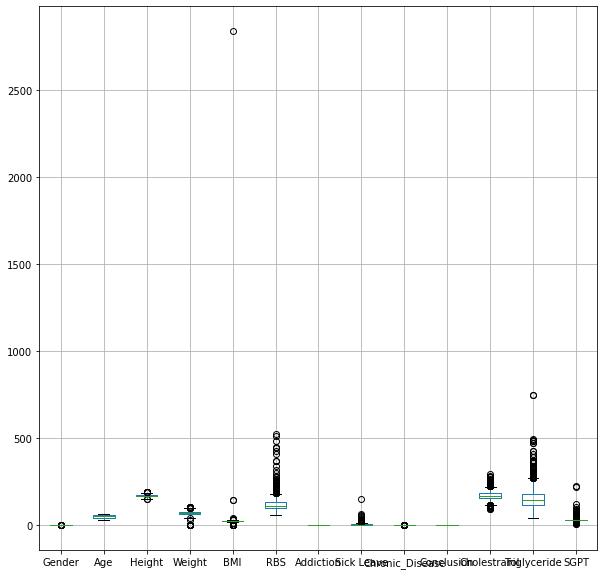

In [140]:
plt.figure(figsize=(10,10))
hdata1.boxplot()

In [141]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [142]:
for column in hdata1.columns:
    if hdata1[column].dtype != 'object': 
        lr,ur=remove_outlier(hdata1[column])
        hdata1[column]=np.where(hdata1[column]>ur,ur,hdata1[column])
        hdata1[column]=np.where(hdata1[column]<lr,lr,hdata1[column])

<AxesSubplot:>

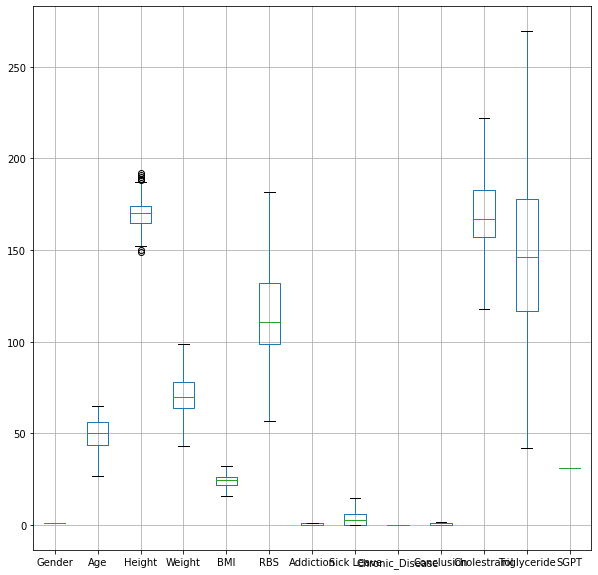

In [143]:
plt.figure(figsize=(10,10))
hdata1.boxplot()

<AxesSubplot:>

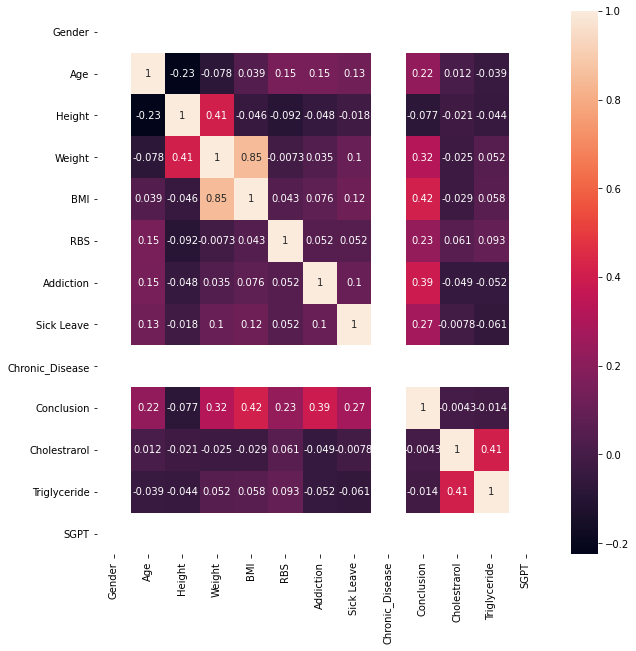

In [144]:
plt.figure(figsize=(10,10))
sns.heatmap(hdata1.corr(), annot=True)

In [145]:
hdata1.describe()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Cholestrarol,Triglyceride,SGPT
count,697.0,697.000000,695.000000,697.000000,697.000000,697.000000,697.000000,697.000000,697.0,697.000000,697.000000,697.000000,697.0
mean,1.0,49.615495,170.074820,70.589670,24.200846,119.170732,0.414634,3.935438,0.0,0.362984,169.484935,152.937590,31.0
std,0.0,8.085654,6.729447,10.992202,3.372337,28.163806,0.493013,4.108111,0.0,0.558586,25.728470,54.440044,0.0
min,1.0,27.000000,149.000000,43.000000,15.780000,57.000000,0.000000,0.000000,0.0,0.000000,118.000000,42.000000,31.0
25%,1.0,44.000000,165.000000,64.000000,22.050000,99.000000,0.000000,0.000000,0.0,0.000000,157.000000,117.000000,31.0
50%,1.0,50.000000,170.000000,70.000000,24.390000,111.000000,0.000000,3.000000,0.0,0.000000,167.000000,146.000000,31.0
75%,1.0,56.000000,174.000000,78.000000,26.230000,132.000000,1.000000,6.000000,0.0,1.000000,183.000000,178.000000,31.0
max,1.0,65.000000,192.000000,99.000000,32.500000,181.500000,1.000000,15.000000,0.0,2.000000,222.000000,269.500000,31.0


In [146]:
print(hdata1.shape)

(697, 16)


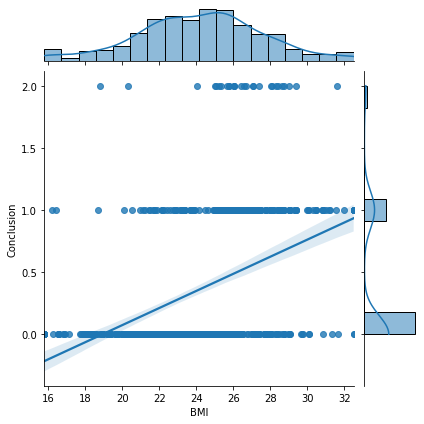

In [147]:
sns.jointplot(x='BMI', y='Conclusion',data=hdata1, kind='reg')

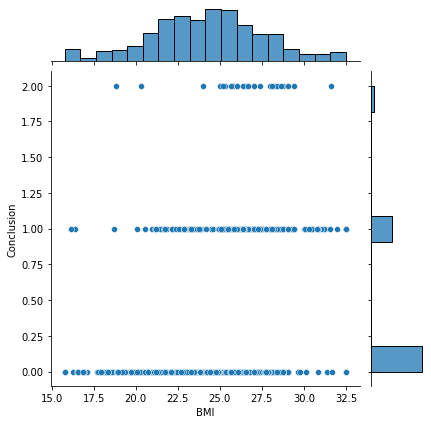

In [148]:
sns.jointplot(x='BMI', y='Conclusion',data=hdata1, kind='scatter')

<Figure size 1440x1440 with 0 Axes>

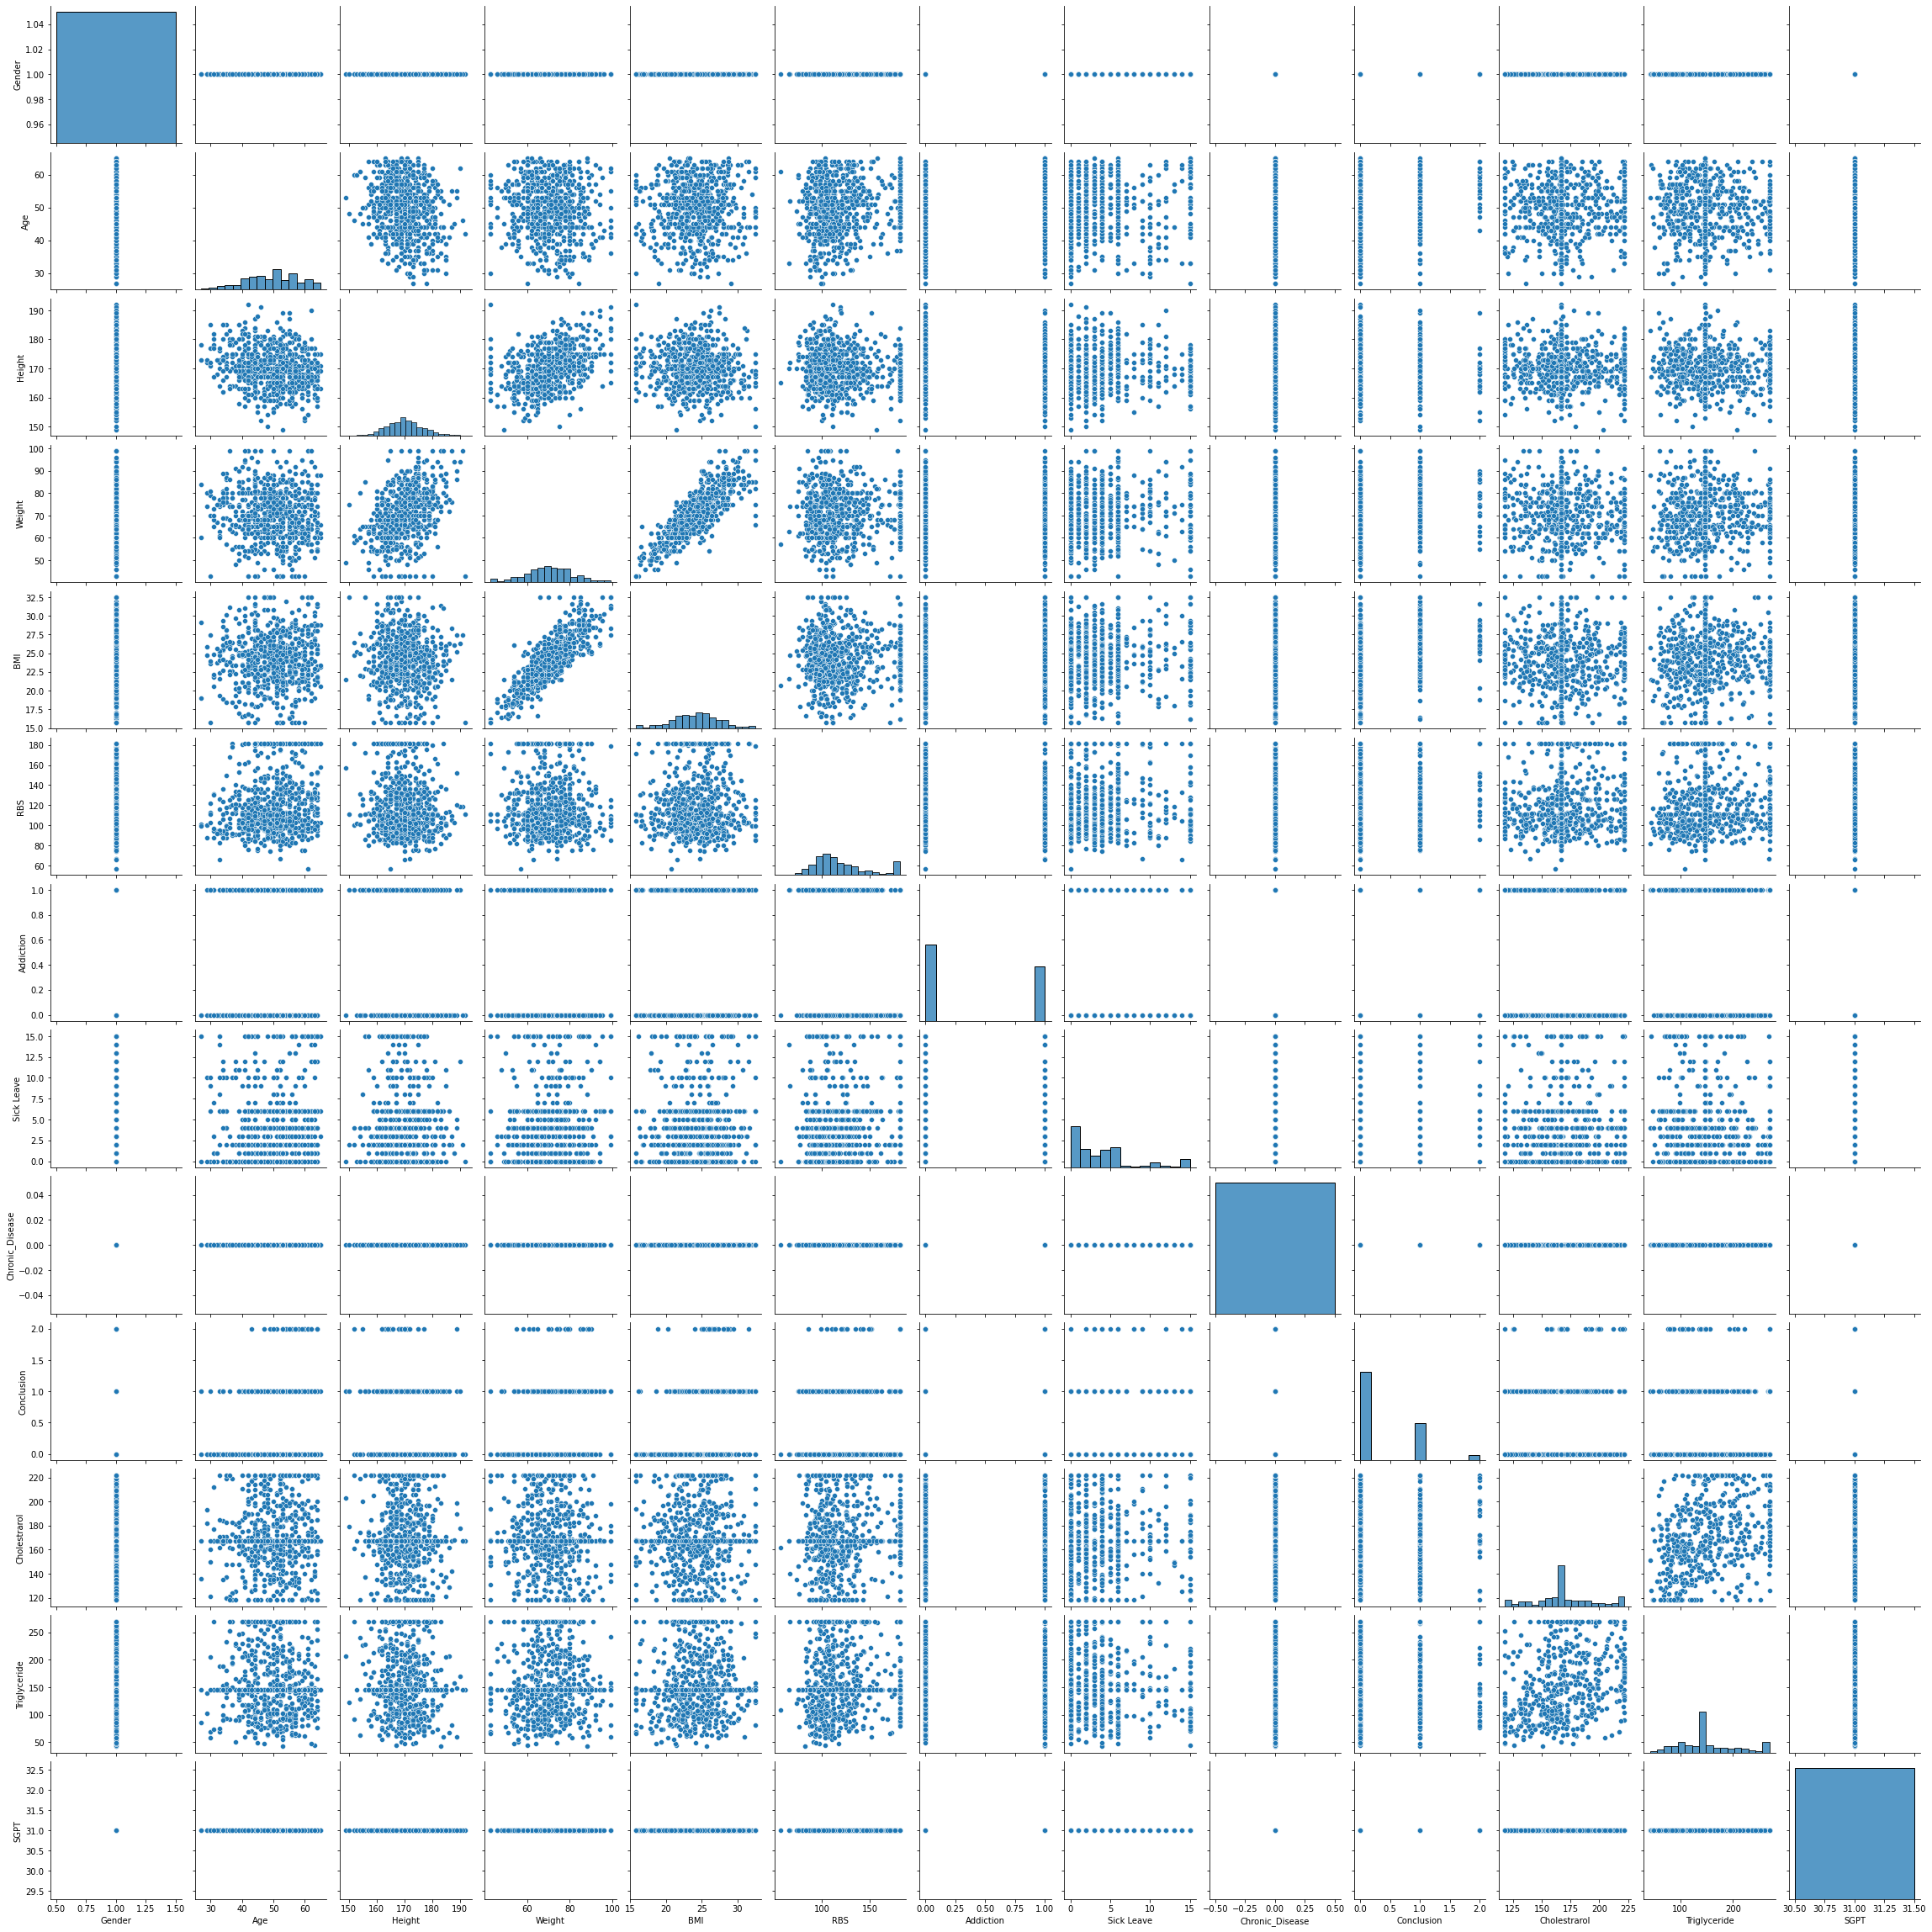

In [149]:
plt.figure(figsize=(20,20))
sns.pairplot(hdata1)

In [150]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,SGPT,SBP,DBP
0,1.0,44.0,180.0,83.0,25.06,84.0,1.0,0.0,0.0,1.0,1,167.0,146.0,31.0,130,80
1,1.0,43.0,169.0,72.0,25.21,116.0,0.0,4.0,0.0,0.0,1,218.0,153.0,31.0,170,110
2,1.0,64.0,166.0,64.0,23.23,94.0,1.0,4.0,0.0,1.0,0.9,167.0,146.0,31.0,120,80
3,1.0,64.0,164.0,84.0,31.23,102.0,1.0,1.0,0.0,1.0,0.9,167.0,146.0,31.0,150,90
4,1.0,63.0,166.0,80.0,29.03,113.0,0.0,12.0,0.0,1.0,1,196.0,148.0,31.0,110,70


<function matplotlib.pyplot.show(close=None, block=None)>

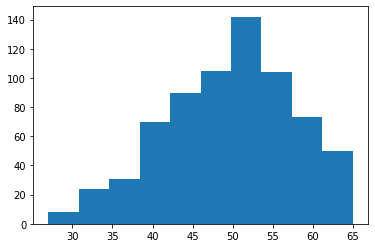

In [151]:
plt.hist(hdata1.Age)
plt.show

In [152]:
hdata1['Result'] = hdata1.Conclusion

In [153]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Conclusion,Creatinine,Cholestrarol,Triglyceride,SGPT,SBP,DBP,Result
0,1.0,44.0,180.0,83.0,25.06,84.0,1.0,0.0,0.0,1.0,1,167.0,146.0,31.0,130,80,1.0
1,1.0,43.0,169.0,72.0,25.21,116.0,0.0,4.0,0.0,0.0,1,218.0,153.0,31.0,170,110,0.0
2,1.0,64.0,166.0,64.0,23.23,94.0,1.0,4.0,0.0,1.0,0.9,167.0,146.0,31.0,120,80,1.0
3,1.0,64.0,164.0,84.0,31.23,102.0,1.0,1.0,0.0,1.0,0.9,167.0,146.0,31.0,150,90,1.0
4,1.0,63.0,166.0,80.0,29.03,113.0,0.0,12.0,0.0,1.0,1,196.0,148.0,31.0,110,70,1.0


In [154]:
hdata1.drop(['Conclusion'],axis=1,inplace=True)

In [155]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Creatinine,Cholestrarol,Triglyceride,SGPT,SBP,DBP,Result
0,1.0,44.0,180.0,83.0,25.06,84.0,1.0,0.0,0.0,1,167.0,146.0,31.0,130,80,1.0
1,1.0,43.0,169.0,72.0,25.21,116.0,0.0,4.0,0.0,1,218.0,153.0,31.0,170,110,0.0
2,1.0,64.0,166.0,64.0,23.23,94.0,1.0,4.0,0.0,0.9,167.0,146.0,31.0,120,80,1.0
3,1.0,64.0,164.0,84.0,31.23,102.0,1.0,1.0,0.0,0.9,167.0,146.0,31.0,150,90,1.0
4,1.0,63.0,166.0,80.0,29.03,113.0,0.0,12.0,0.0,1,196.0,148.0,31.0,110,70,1.0


In [156]:
hdata1["SBP"] = pd.to_numeric(hdata1["SBP"], downcast="integer")
hdata1["DBP"] = pd.to_numeric(hdata1["DBP"], downcast="integer")

In [157]:
hdata1.shape

(697, 16)

In [158]:
hdata1.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'BMI', 'RBS', 'Addiction',
       'Sick Leave', 'Chronic_Disease', 'Creatinine', 'Cholestrarol',
       'Triglyceride', 'SGPT', 'SBP', 'DBP', 'Result'],
      dtype='object')

In [160]:
hdata1.head()

,Gender,Age,Height,Weight,BMI,RBS,Addiction,Sick Leave,Chronic_Disease,Creatinine,Cholestrarol,Triglyceride,SGPT,SBP,DBP,Result
0,1.0,44.0,180.0,83.0,25.06,84.0,1.0,0.0,0.0,1,167.0,146.0,31.0,130.0,80.0,1.0
1,1.0,43.0,169.0,72.0,25.21,116.0,0.0,4.0,0.0,1,218.0,153.0,31.0,170.0,110.0,0.0
2,1.0,64.0,166.0,64.0,23.23,94.0,1.0,4.0,0.0,0.9,167.0,146.0,31.0,120.0,80.0,1.0
3,1.0,64.0,164.0,84.0,31.23,102.0,1.0,1.0,0.0,0.9,167.0,146.0,31.0,150.0,90.0,1.0
4,1.0,63.0,166.0,80.0,29.03,113.0,0.0,12.0,0.0,1,196.0,148.0,31.0,110.0,70.0,1.0


In [176]:
hdata1.isnull().values.any()
hdata1.isnull().sum().sum()

0

In [238]:
hdata1['Age'] = hdata1['Age'].fillna(value=hdata1['Age'].median())
hdata1['Height'] = hdata1['Height'].fillna(value=hdata1['Height'].median())
hdata1['SBP'] = hdata1['SBP'].fillna(value=hdata1['SBP'].median())
hdata1['DBP'] = hdata1['DBP'].fillna(value=hdata1['DBP'].median())
hdata1.isnull().sum().sum()

0

In [266]:
from sklearn.model_selection import train_test_split
X=hdata1.drop(['Result','Creatinine', 'Cholestrarol','Triglyceride', 'SGPT'],axis=1).values
y=hdata1['Result'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=0,stratify=hdata1['Result'])

In [267]:
# from sklearn.preprocessing import MinMaxScaler
# sc=MinMaxScaler()
# X_train=sc.fit_transform(X_train)
# X_test=sc.transform(X_test)

In [268]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [269]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='lbfgs',multi_class='multinomial',random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', random_state=0)

In [270]:
y_pred=classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1))

[[0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [2. 2.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 2.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [2. 0.]
 [1. 2.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 2.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 2.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 

In [271]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[88  6  1]
 [19 20  0]
 [ 0  5  1]]


0.7785714285714286

In [272]:
print('Training set score: {:.4f}'.format(classifier.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(classifier.score(X_test, y_test)))

Training set score: 0.8097
Test set score: 0.7786


True

26

0